# Data Processing and Classification Modeling

In this notebook, we will:
- Handle missing values
- Standardize the dataset
- Build and evaluate models using Neural Network, XGBoost, and RandomForest

The model evaluations will be based on the Weighted Macro F1 Score.

In [15]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)



In [5]:
# Load the dataset
df = pd.read_csv('synthetic_dataset.csv')



In [6]:
# Splitting data into train and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



-- why did we choose 80 - 20 ?

### Data Preprocessing:

1. **Handling Missing Values**: We handle missing values in numeric features by imputing the mean of the respective columns.
2. **Standardization**: After imputation, we standardize the numeric features to have a mean of 0 and a variance of 1.


In [7]:
# Preprocessing steps
numeric_features = ['x1', 'x2', 'x3', 'x4', 'x5']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])



In [8]:
# Models definition
models = {
    "Neural Network": MLPClassifier(),
    "XGBoost": XGBClassifier(),
    "RandomForest": RandomForestClassifier()
}



In [9]:
# Hyperparameter Tuning
parameters_nn = {
    'classifier__hidden_layer_sizes': [(50, 50), (100,)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__solver': ['sgd', 'adam'],
    'classifier__alpha': [0.0001, 0.05],
    'classifier__max_iter': [300]
}

parameters_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

parameters_xgb = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7]
}

param_grids = {
    "Neural Network": parameters_nn,
    "XGBoost": parameters_xgb,
    "RandomForest": parameters_rf
}

results = {}

In [10]:
# Evaluating Models with GridSearch
best_params = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)
                              ])
    search = GridSearchCV(pipeline, param_grids[name], n_jobs=1)
    search.fit(X_train, y_train)
    best_params[name] = search.best_params_
    predictions = search.predict(X_test)
    score = f1_score(y_test, predictions, average='weighted')
    results[name] = score

In [11]:
for name, model in models.items():
    # other code here
    predictions = search.predict(X_test)
    cm = confusion_matrix(y_test, predictions) 
    print(f'Confusion Matrix for {name}: \n', cm)

    print(f"Classification Report for {name}:\n", classification_report(y_test, predictions))

Confusion Matrix for Neural Network: 
 [[18 23 15]
 [28 24 20]
 [23 27 22]]
Classification Report for Neural Network:
               precision    recall  f1-score   support

           0       0.26      0.32      0.29        56
           1       0.32      0.33      0.33        72
           2       0.39      0.31      0.34        72

    accuracy                           0.32       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.33      0.32      0.32       200

Confusion Matrix for XGBoost: 
 [[18 23 15]
 [28 24 20]
 [23 27 22]]
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.26      0.32      0.29        56
           1       0.32      0.33      0.33        72
           2       0.39      0.31      0.34        72

    accuracy                           0.32       200
   macro avg       0.32      0.32      0.32       200
weighted avg       0.33      0.32      0.32       200

Confusion Matr

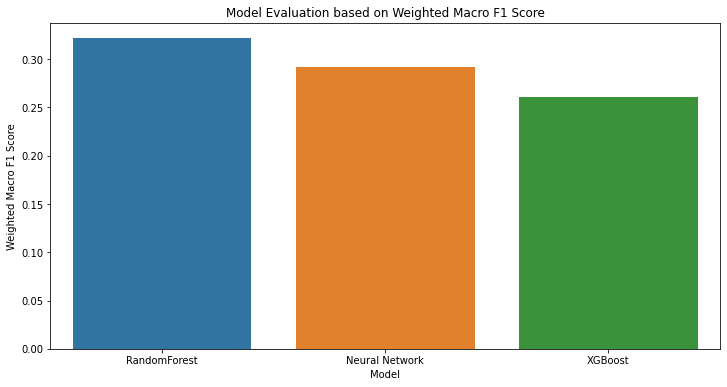

In [16]:
# Model evaluation visualization
results_df = pd.DataFrame(results.items(), columns=['Model', 'Weighted Macro F1 Score']).sort_values(by='Weighted Macro F1 Score', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Model', y='Weighted Macro F1 Score')
plt.title("Model Evaluation based on Weighted Macro F1 Score")
plt.show()